<a href="https://colab.research.google.com/github/dimitriy-t/cs_480/blob/master/CS480_A4_Q1_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

def defineCNN(shape, dropout, num_classes, verbose):
    name = f"cifar10_dropout_{dropout}_cnn_network"

    if verbose:
      print(f"Building {name}")
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    if (dropout):
      model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    if (dropout):
      model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))

    if (dropout):
      model.add(Dropout(0.25))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return (name, model)

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import json
import os

def generateTrainHistory(save_dir, epochs, dropout, data_augmentation, verbose=False):
  batch_size = 32
  num_classes = 10
  num_predictions = 20

  # The data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  if verbose:
    print('x_train shape:', x_train.shape)
    print('input shape:', x_train.shape[1:])
    print('x_test shape:', x_test.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)

  # Get the model
  (name, model) = defineCNN(x_train.shape[1:], dropout, num_classes, verbose)

  # initiate RMSprop optimizer
  opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  if not data_augmentation:
      if verbose:
        print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)

  else:
    if verbose:
      print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train,
                        batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

  # Save model history
  history_name = os.path.join(save_dir, f"{num_epochs}_{name}_data_aug_{data_augmentation}_history.json")
  with open(history_name, 'w') as f:
    json.dump(history.history, f)

  print(f"Training data for {name} is now available under {history_name}")

In [ ]:
import os

save_dir = os.path.join(os.getcwd(), 'drive/MyDrive/CS480_A4')

num_epochs = 100

#generateTrainHistory(save_dir, num_epochs, False, False)
#generateTrainHistory(save_dir, num_epochs, False, True)
#generateTrainHistory(save_dir, num_epochs, True, False)
generateTrainHistory(save_dir, num_epochs, True, True)

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/100
1563/1563 [==============================] - 51s 26ms/step - loss: 1.8086 - accuracy: 0.3443 - val_loss: 1.6614 - val_accuracy: 0.4060
Epoch 2/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5373 - accuracy: 0.4451 - val_loss: 1.3954 - val_accuracy: 0.5037
Epoch 3/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3994 - accuracy: 0.4985 - val_loss: 1.2269 - val_accuracy: 0.5664
Epoch 4/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3070 - accuracy: 0.5314 - val_loss: 1.1899 - val_accuracy: 0.5729
Epoch 5/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2322 - accuracy: 0.5621 - val_loss: 1.1175 - val_accuracy: 0.6019
Epoch 6/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1700 - accuracy: 0.5858 - val_loss: 1.0597 - val_accuracy: 0.6251
Epoch 7/100
1563/1563 [============================

# New Section

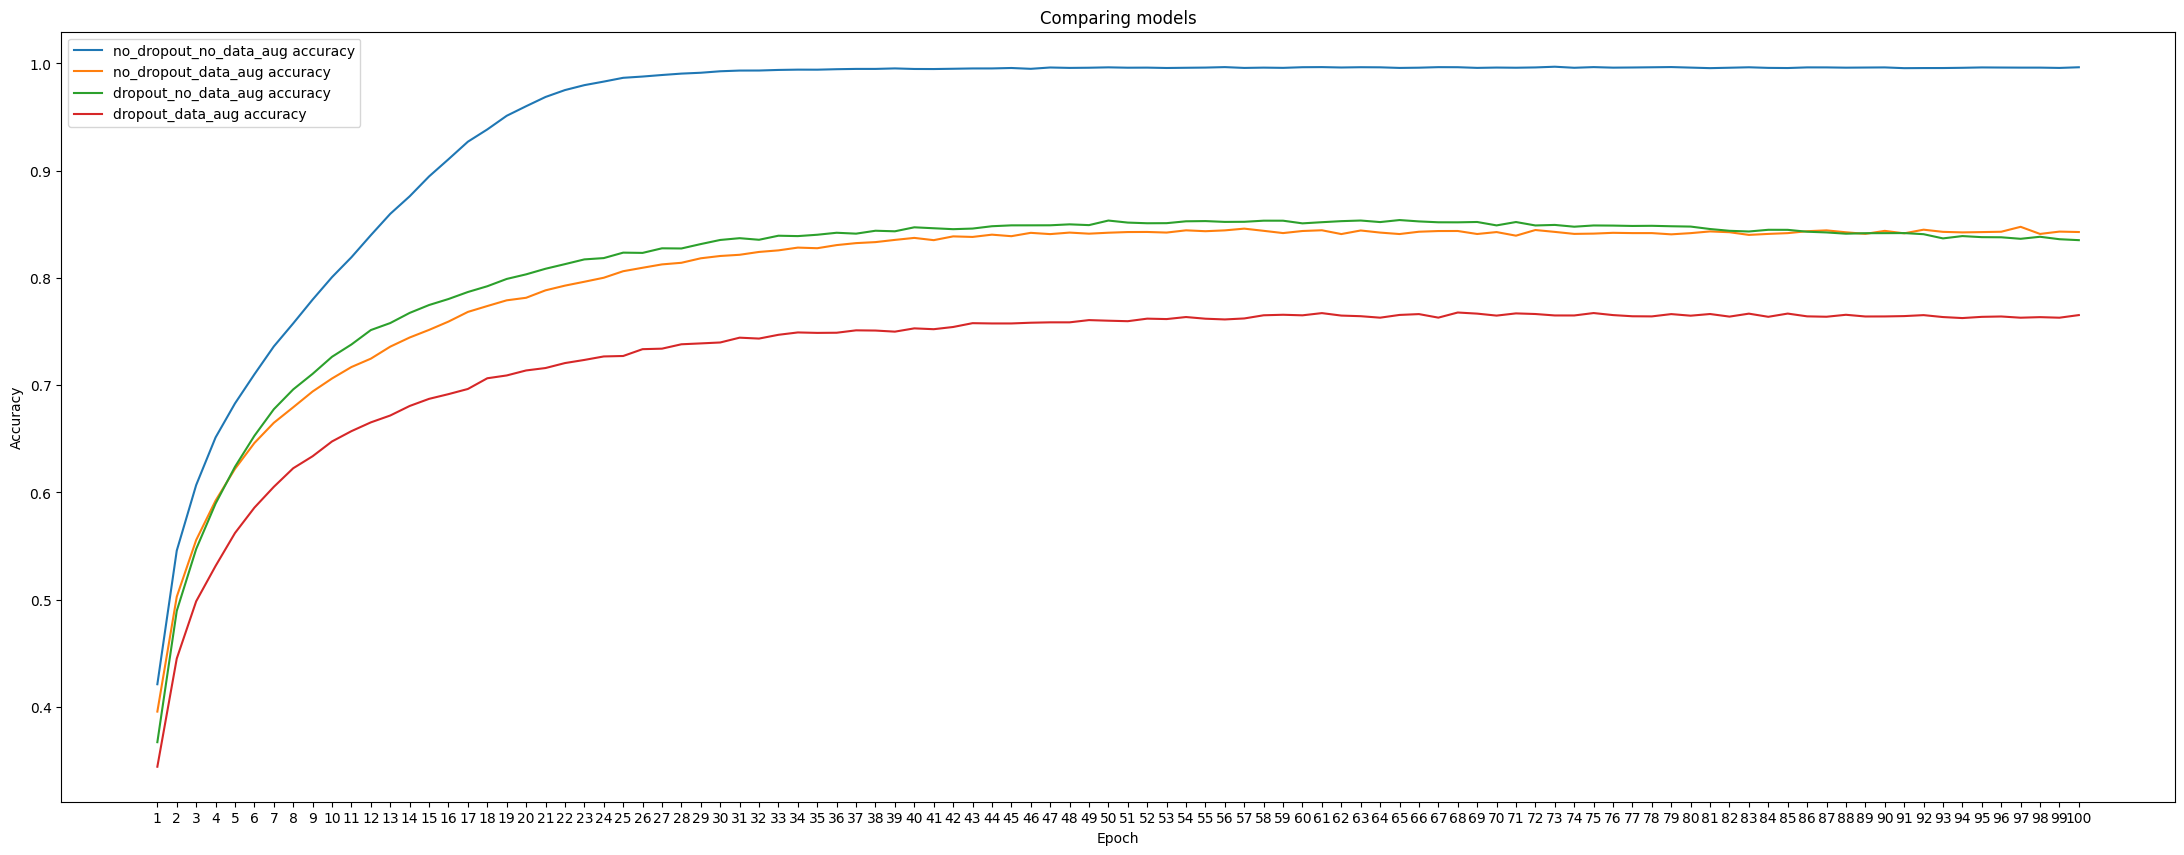

In [ ]:
import matplotlib.pyplot as plt
import os
import json

def load_history(name):
  filename = os.path.join(os.getcwd(), 'drive/MyDrive/CS480_A4/', name)

  with open(filename, 'r') as f:
    history = json.load(f)

  return history

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(60, 10))
plt.subplot(1, 2, 1)
plt.title('Comparing models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)

history1 = load_history(f"{num_epochs}_cifar10_dropout_False_cnn_network_data_aug_False_history.json")
plt.plot(epochs, history1['accuracy'], label='no_dropout_no_data_aug accuracy')

history2 = load_history(f"{num_epochs}_cifar10_dropout_False_cnn_network_data_aug_True_history.json")
plt.plot(epochs, history2['accuracy'], label='no_dropout_data_aug accuracy')

history3 = load_history(f"{num_epochs}_cifar10_dropout_True_cnn_network_data_aug_False_history.json")
plt.plot(epochs, history3['accuracy'], label='dropout_no_data_aug accuracy')

history4 = load_history(f"{num_epochs}_cifar10_dropout_True_cnn_network_data_aug_True_history.json")
plt.plot(epochs, history4['accuracy'], label='dropout_data_aug accuracy')


plt.legend()

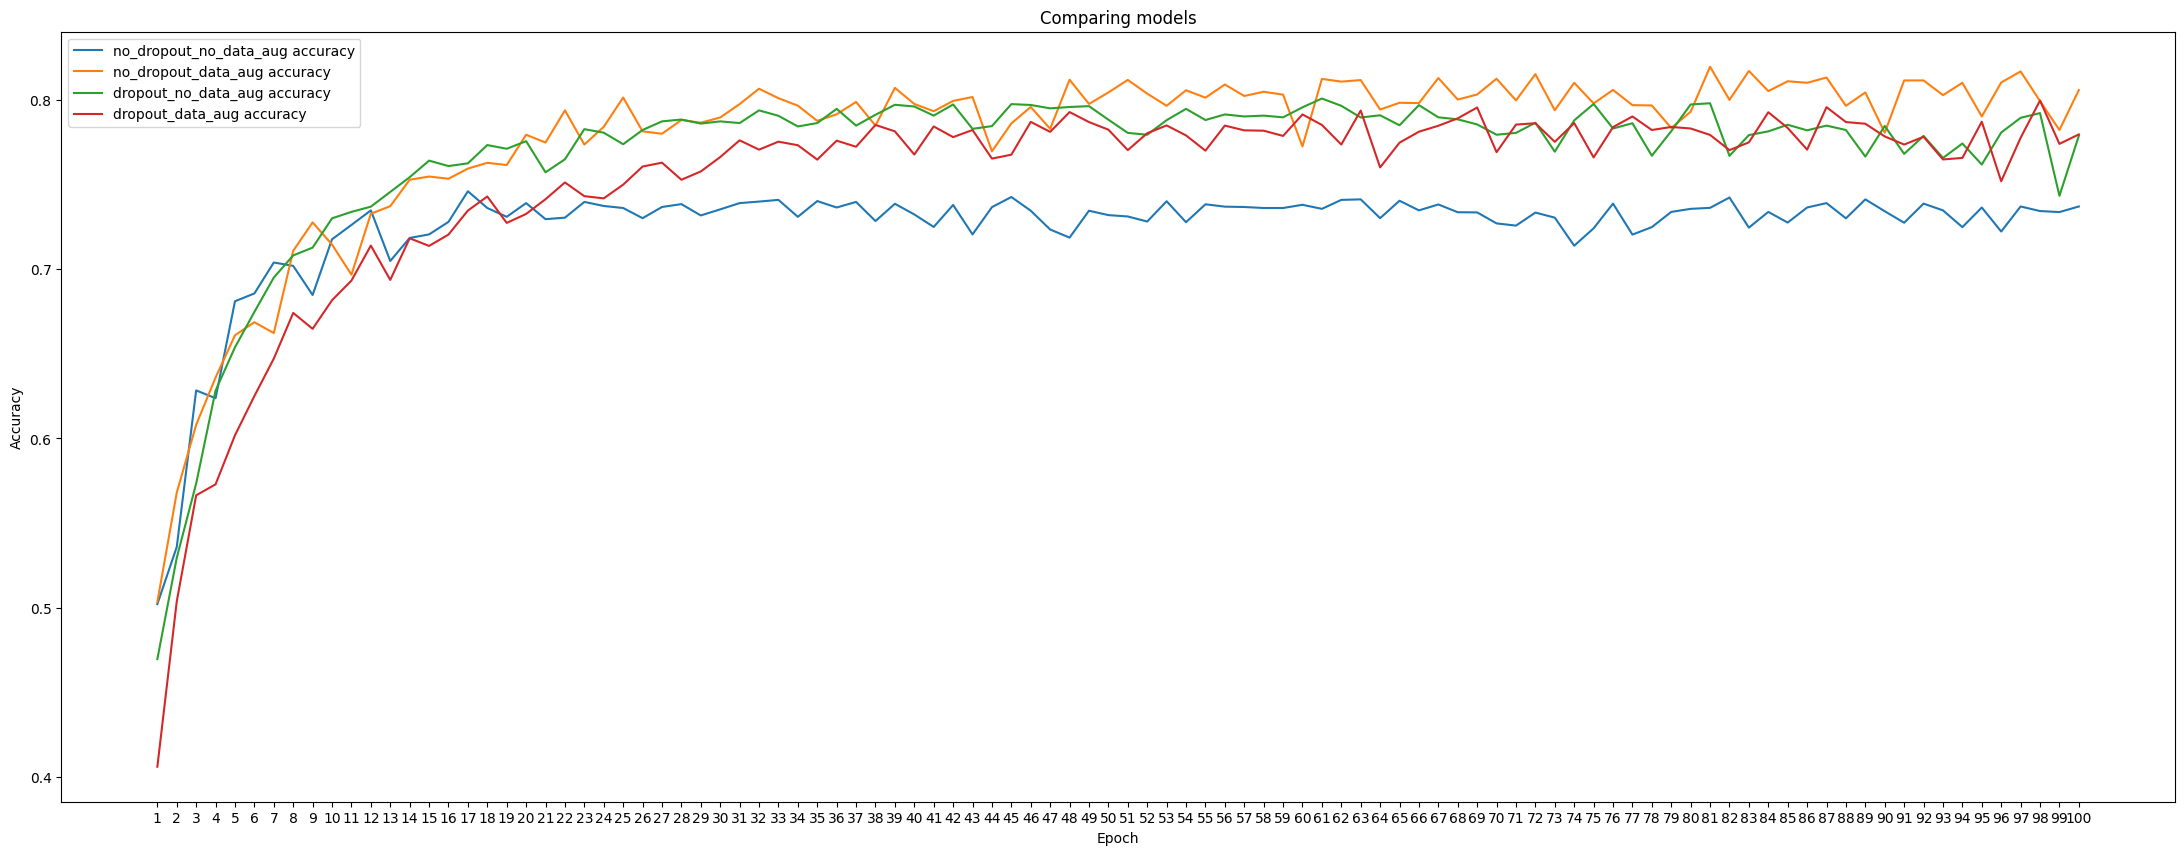

In [ ]:
import matplotlib.pyplot as plt
import os
import json

def load_history(name):
  filename = os.path.join(os.getcwd(), 'drive/MyDrive/CS480_A4/', name)

  with open(filename, 'r') as f:
    history = json.load(f)

  return history

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(60, 10))
plt.subplot(1, 2, 1)
plt.title('Comparing models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)

history1 = load_history(f"{num_epochs}_cifar10_dropout_False_cnn_network_data_aug_False_history.json")
plt.plot(epochs, history1['val_accuracy'], label='no_dropout_no_data_aug accuracy')

history2 = load_history(f"{num_epochs}_cifar10_dropout_False_cnn_network_data_aug_True_history.json")
plt.plot(epochs, history2['val_accuracy'], label='no_dropout_data_aug accuracy')

history3 = load_history(f"{num_epochs}_cifar10_dropout_True_cnn_network_data_aug_False_history.json")
plt.plot(epochs, history3['val_accuracy'], label='dropout_no_data_aug accuracy')

history4 = load_history(f"{num_epochs}_cifar10_dropout_True_cnn_network_data_aug_True_history.json")
plt.plot(epochs, history4['val_accuracy'], label='dropout_data_aug accuracy')

plt.legend()